In [1]:
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from input_data import *
import csv

repins_map = {}

total_repins = 0
total_users = None
with open(INPUT_REPINS, 'rb') as repins_file:
    reader = csv.reader(repins_file, delimiter='|')
    
    for row in reader:
        total_repins += 1
        
        user_id = int(row[0])
        pin_id = int(row[1])
        
        if user_id in repins_map:
            repins_map[user_id] += 1
        else:
            repins_map[user_id] = 1

total_users = len(repins_map)

items = repins_map.items()
min_no_of_repins = min(items, key=lambda x: x[1])[1]
max_no_of_repins = max(items, key=lambda x: x[1])[1]

print 'Minimum number of repins', min_no_of_repins
print 'Maximum number of repins', max_no_of_repins
print 'Average number of repins per user', total_repins / total_users

Minimum number of repins 1
Maximum number of repins 14
Average number of repins per user 1.96342992141


In [7]:
map_pins_per_category = {}

with open(INPUT_REPINS, 'rb') as repins_file:
    reader = csv.reader(repins_file, delimiter='|')
    
    for row in reader:
        user_id = int(row[0])
        pin_id = int(row[1])
        cat_id = int(row[2])
        
        if cat_id in map_pins_per_category:
            map_pins_per_category[cat_id] += 1
        else:
            map_pins_per_category[cat_id] = 1

map_categories = {}
with open(INPUT_CATEGORIES, 'rb') as repins_file:
    reader = csv.reader(repins_file, delimiter='|')
    
    for row in reader:
        cat_name = row[0]
        cat_id = int(row[1])
        map_categories[cat_id] = cat_name

for cat_id in map_pins_per_category.keys():
    if cat_id not in map_categories:
        print 'Unknown category id', cat_id
        continue
    
    cat_name = map_categories[cat_id]
    
    print cat_name, 'has', map_pins_per_category[cat_id], 'repins' 

animals has 10475 repins
architecture has 6456 repins
art has 5966 repins
cars_motorcycles has 8858 repins
celebrities has 3896 repins
design has 6013 repins
diy_crafts has 1588 repins
education has 1776 repins
film_music_books has 3536 repins
food_drink has 902 repins
gardening has 1957 repins
geek has 4426 repins
hair_beauty has 998 repins
health_fitness has 357 repins
history has 2941 repins
holidays_events has 302 repins
home_decor has 3247 repins
humor has 2533 repins
illustrations_posters has 539 repins
kids has 453 repins
mens_fashion has 4008 repins
outdoors has 1222 repins
photography has 1730 repins
products has 468 repins
quotes has 727 repins
science_nature has 1536 repins
sports has 959 repins
tattoos has 660 repins
technology has 422 repins
travel has 1465 repins
weddings has 218 repins
womens_fashion has 813 repins


(-0.5, 399.5, 199.5, -0.5)

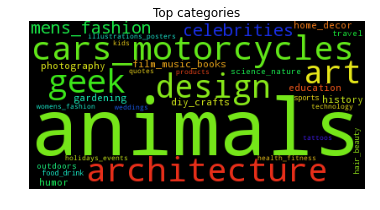

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_categories = []
for cat_id in map_pins_per_category.keys():
    if cat_id not in map_categories:
        print 'Unknown category id', cat_id
        continue
    
    cat_name = map_categories[cat_id]
    count = map_pins_per_category[cat_id]
    for i in range(count):
        wc_categories.append(cat_name)
    
str_categories = ','.join(wc_categories)

wordcloud = WordCloud().generate(str_categories)
# Open a plot of the generated image.
plt.title('Top categories')
plt.imshow(wordcloud)
plt.axis("off")

No of intervals: 17
Interval size: 0.764705882353


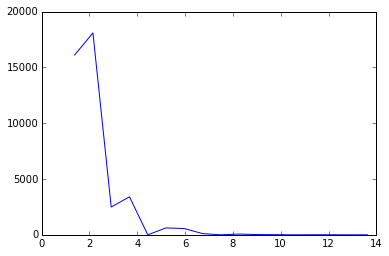

In [13]:
import matplotlib.pyplot as plt
import math

no_of_intervals =int(1 + 3.322 * math.log10(total_repins))
print 'No of intervals:', no_of_intervals
interval_size = (max_no_of_repins - min_no_of_repins) * 1. / no_of_intervals
print 'Interval size:', interval_size

distribution = []
for i in range(no_of_intervals):
    interval_start = min_no_of_repins + i * interval_size
    interval_end = interval_start + interval_size
    
    count = sum([1 for x in repins_map.values() if x >= interval_start and x < interval_end])
    interval_middle = (interval_start + interval_end) / 2
    item = (interval_middle, count)

    distribution.append(item)

x = [z[0] for z in distribution]
y = [z[1] for z in distribution]
plt.plot(x, y)